<center> <span style="color:#0F3460;font-size:30px; font-weight: bold; padding:250px ;">Elevator Predictive Maintenance</span> </center>

<span> <center>Datasets:https://www.kaggle.com/datasets/shivamb/elevator-predictive-maintenance-dataset </center></span>

<center><span style="color:#0F3460;font-size:21px; font-weight: bold;">


<span style="color:#0F3460;font-size:21px; font-weight: bold;">1.1 Importing libaries </span>

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

<hr>

  <center><span style="color:#0F3460;font-size:30px; font-weight: bold;">Part 1</span> </center> <br>
  
  <center><span style="color:#0F3460;font-size:23px; font-weight: bold;">Data Preprocessing</span>  </center>

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.2 Importing My Data From *csv* File</span>

In [77]:
epm = pd.read_csv("predictive-maintenance-dataset.csv")

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.3 Top 5 Rows</span>

In [78]:
epm.head()

,ID,revolutions,humidity,vibration,x1,x2,x3,x4,x5
0,1,93.744,73.999,18.0,167.743,19.745,1.266828,8787.937536,5475.852001
1,2,93.740,73.999,18.0,167.739,19.741,1.266774,8787.187600,5475.852001
2,3,93.736,73.998,18.0,167.734,19.738,1.266737,8786.437696,5475.704004
3,4,93.732,73.998,18.0,167.730,19.734,1.266683,8785.687824,5475.704004
4,5,93.729,73.998,18.0,167.727,19.731,1.266642,8785.125441,5475.704004


- ID: Used for tracking and managing records.
- Revolutions: Key feature for assessing wear and predicting when maintenance is needed based on usage.
- Humidity: Helps in understanding environmental factors affecting machinery performance.
- Vibration: Critical for early detection of mechanical issues, allowing for preventive actions.
- x1 to x5: Enhance the model by providing additional context and potentially capturing complex interactions affecting machinery health.



 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.4 Info</span>

In [79]:
epm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112001 entries, 0 to 112000
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           112001 non-null  int64  
 1   revolutions  112001 non-null  float64
 2   humidity     112001 non-null  float64
 3   vibration    109563 non-null  float64
 4   x1           112001 non-null  float64
 5   x2           112001 non-null  float64
 6   x3           112001 non-null  float64
 7   x4           112001 non-null  float64
 8   x5           112001 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 7.7 MB


 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.5 Cleaning</span>

In [80]:
epm_clean = epm.isnull().sum()
epm_clean

ID                0
revolutions       0
humidity          0
vibration      2438
x1                0
x2                0
x3                0
x4                0
x5                0
dtype: int64

In [81]:
epm_clean = epm.dropna()
epm_clean.isnull().sum()

ID             0
revolutions    0
humidity       0
vibration      0
x1             0
x2             0
x3             0
x4             0
x5             0
dtype: int64

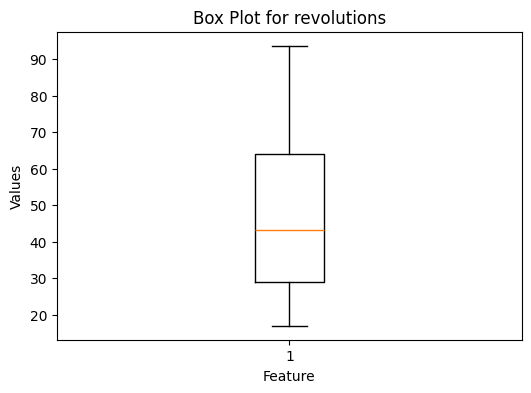

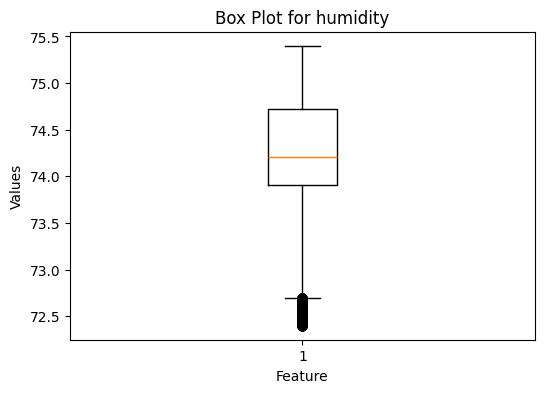

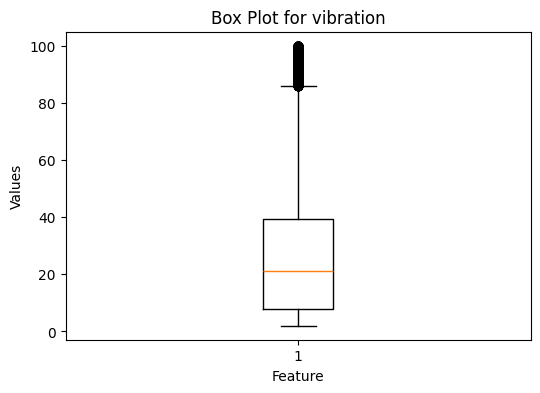

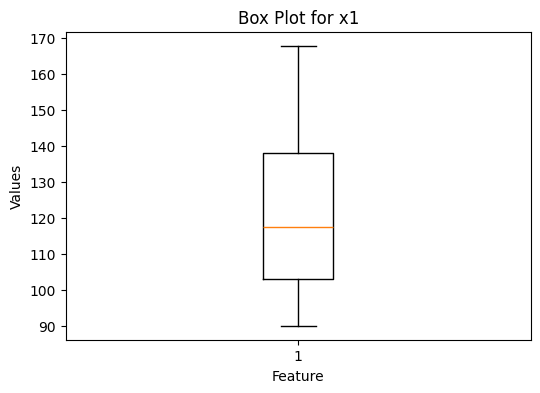

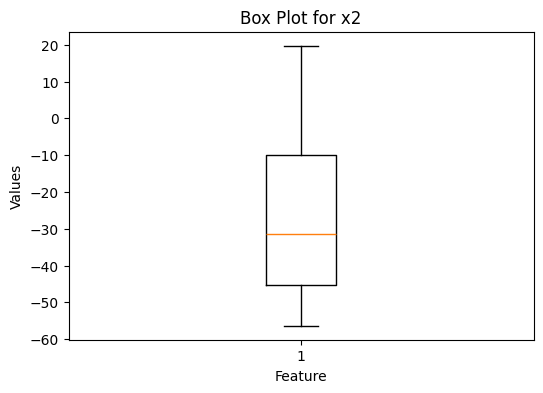

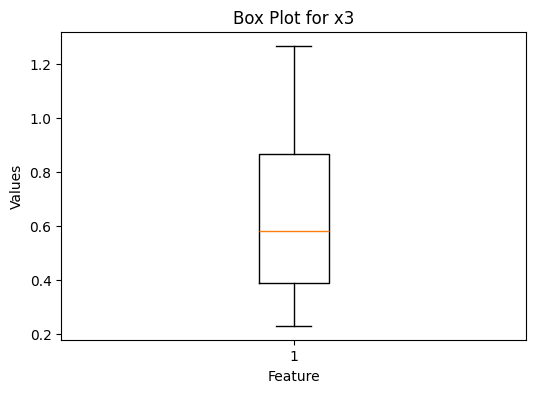

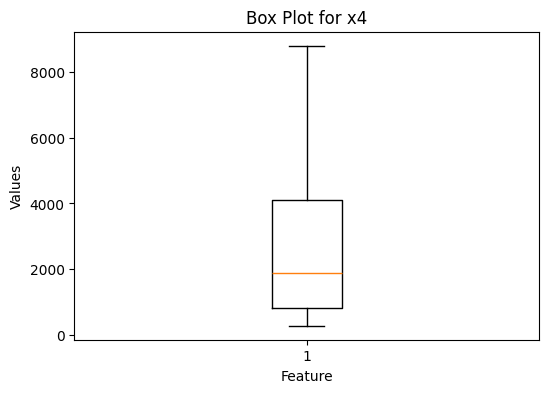

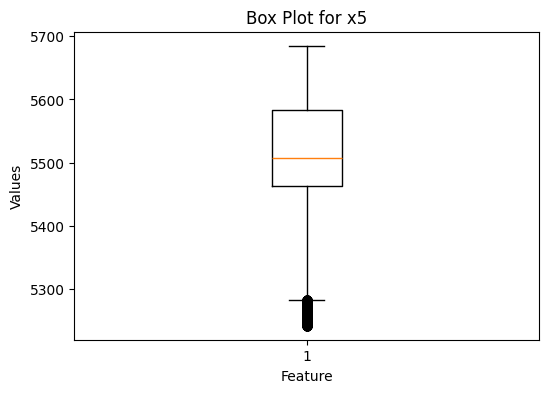

In [82]:
import matplotlib.pyplot as plt

# Extract all the features from the data
features = ['revolutions', 'humidity', 'vibration', 'x1', 'x2', 'x3', 'x4', 'x5']

# Create a box plot for each feature
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.boxplot(epm_clean[feature])
    plt.title(f'Box Plot for {feature}')
    plt.xlabel('Feature')
    plt.ylabel('Values')
    plt.show()

In [83]:
# Convert the numpy array to a pandas DataFrame
data_df = pd.DataFrame(epm_clean, columns=['revolutions', 'humidity', 'vibration'])

# Calculate the z-scores
z_scores = stats.zscore(data_df.loc[:, ['revolutions', 'humidity', 'vibration']])

# Rest of the code...
z_scores = stats.zscore(epm_clean.loc[:, ['revolutions', 'humidity', 'vibration']])
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

print("Number of outliers:", outliers.sum())


Number of outliers: 0


double check -- there is a problem


In [84]:
Q1 = epm_clean.quantile(0.25)
Q3 = epm_clean.quantile(0.75)
IQR = Q3 - Q1
outliers = ((epm_clean < (Q1 - 1.5 * IQR)) | (epm_clean > (Q3 + 1.5 * IQR))).any(axis=1)
print("Number of outliers:", outliers.sum())


Number of outliers: 8279


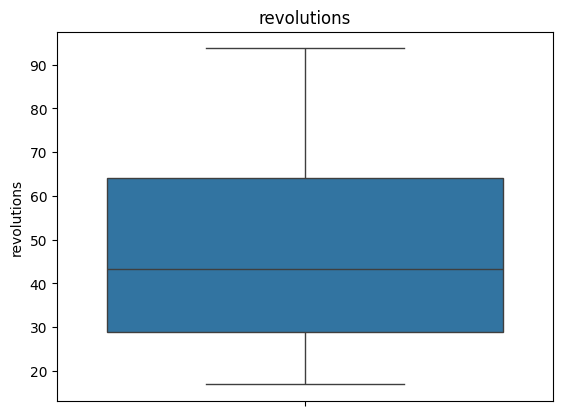

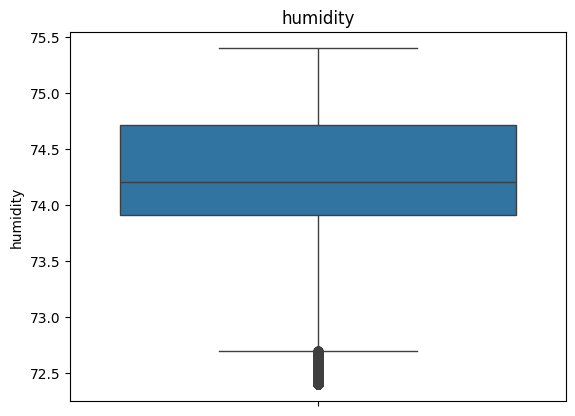

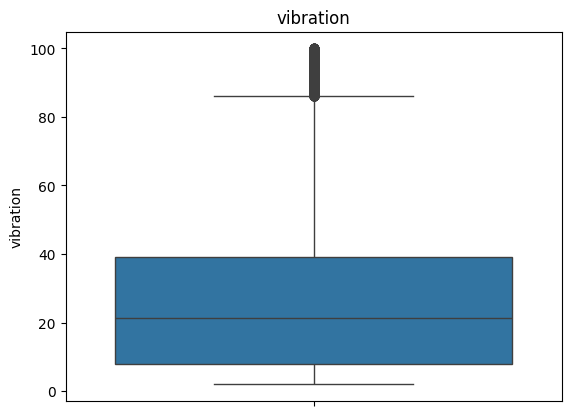

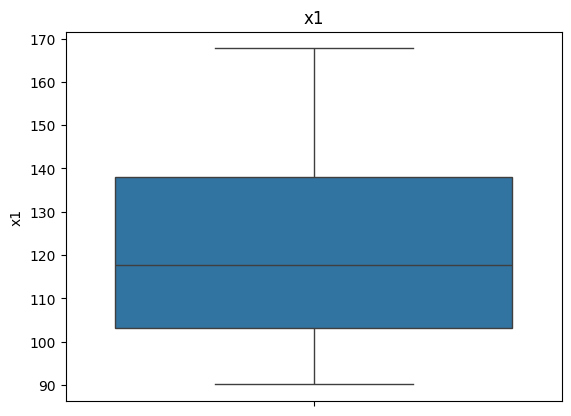

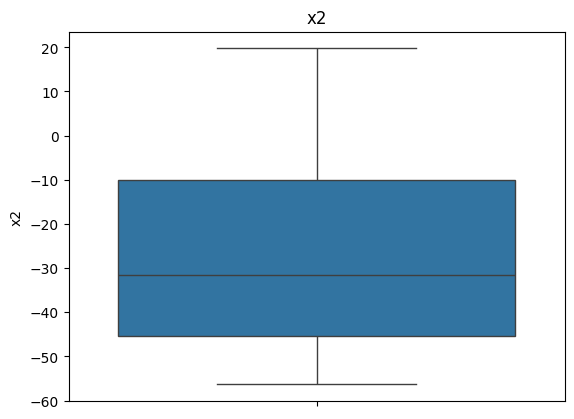

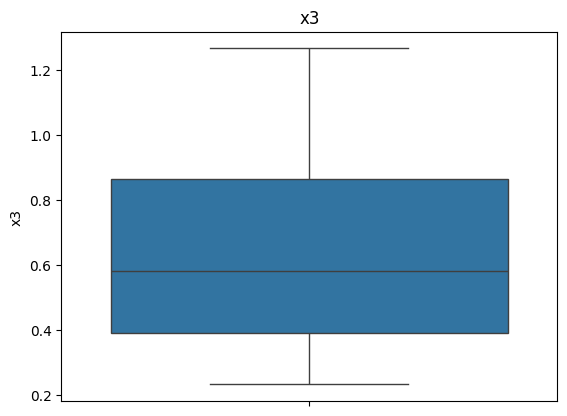

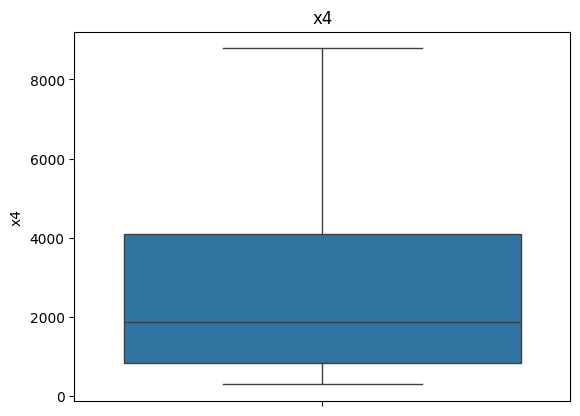

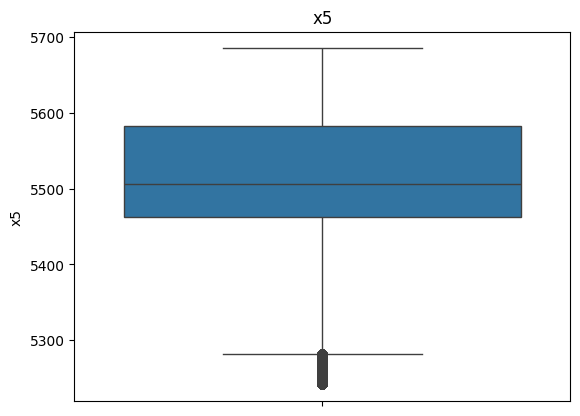

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot box plots to visualize outliers for each feature
for column in ['revolutions', 'humidity', 'vibration', 'x1', 'x2', 'x3', 'x4', 'x5']:
    sns.boxplot(epm_clean[column])
    plt.title(column)
    plt.show()


For Numerical Measurements:

In [86]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
numerical_features = ['revolutions', 'x1', 'x2', 'x3', 'x4', 'x5']
scaler_numerical = StandardScaler()
epm_clean[numerical_features] = scaler_numerical.fit_transform(epm_clean[numerical_features])


/tmp/ipykernel_65633/2564903620.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epm_clean[numerical_features] = scaler_numerical.fit_transform(epm_clean[numerical_features])


For Environmental Factors:

In [87]:
# Standardize environmental features
environmental_features = ['humidity', 'vibration']
scaler_env = StandardScaler()
epm_clean[environmental_features] = scaler_env.fit_transform(epm_clean[environmental_features])


/tmp/ipykernel_65633/2383275075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epm_clean[environmental_features] = scaler_env.fit_transform(epm_clean[environmental_features])


outliers

In [88]:
from scipy import stats

# Calculate Z-scores for numerical features
z_scores = stats.zscore(epm_clean[numerical_features])
outliers = (abs(z_scores) > 3).any(axis=1)

# Remove outliers
data_cleaned = epm_clean[~outliers]


new features

In [89]:
# Example of feature engineering
data_cleaned['vibration_ratio'] = data_cleaned['vibration'] / data_cleaned['revolutions']
data_cleaned['humidity_ratio'] = data_cleaned['humidity'] / data_cleaned['revolutions']


/tmp/ipykernel_65633/550244140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['vibration_ratio'] = data_cleaned['vibration'] / data_cleaned['revolutions']
/tmp/ipykernel_65633/550244140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['humidity_ratio'] = data_cleaned['humidity'] / data_cleaned['revolutions']


Feature Selection

In [90]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define target variable
y = data_cleaned['revolutions']  # Replace 'target' with your actual target variable

# Select top features based on ANOVA F-value
selector = SelectKBest(score_func=f_classif, k='all')
X = data_cleaned.drop(columns=['revolutions'])  # Drop target column for feature selection
X_new = selector.fit_transform(X, y)

# Print selected feature scores
scores = selector.scores_
print("Feature scores:", scores)


Feature scores: [ 6.86357202e+01  5.20323923e+00  1.32446676e+00  4.83186468e+03
  4.90298514e+03  9.38019259e+03 -4.66982665e+15  5.15325345e+00
  6.53520633e+02  5.24052059e+03]


In [91]:
# Convert continuous target variable to discrete classes
y = pd.cut(y, bins=3, labels=False)

# Prepare training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)


Model Accuracy: 1.0


In [92]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9877
           1       1.00      1.00      1.00      8679
           2       1.00      1.00      1.00      3179

    accuracy                           1.00     21735
   macro avg       1.00      1.00      1.00     21735
weighted avg       1.00      1.00      1.00     21735

Confusion Matrix:
 [[9877    0    0]
 [   0 8679    0]
 [   0    0 3179]]


<hr>

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.9 Feature Scalling</span>

In [ ]:
#feature scaling    
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df['revolutions'] = scaler.fit_transform(train_df['revolutions'].values.reshape(-1,1))
train_df['humidity'] = scaler.fit_transform(train_df['humidity'].values.reshape(-1,1))
train_df['vibration'] = scaler.fit_transform(train_df['vibration'].values.reshape(-1,1))
train_df['x1'] = scaler.fit_transform(train_df['x1'].values.reshape(-1,1))
train_df['x2'] = scaler.fit_transform(train_df['x2'].values.reshape(-1,1))
train_df['x3'] = scaler.fit_transform(train_df['x3'].values.reshape(-1,1))
train_df['x4'] = scaler.fit_transform(train_df['x4'].values.reshape(-1,1))
train_df['x5'] = scaler.fit_transform(train_df['x5'].values.reshape(-1,1))

train_df.head()

# Prepare data for revolutions vs. x1 plot
revolutions = train_df['revolutions']
x1 = train_df['x1']
time_revolutions = np.arange(len(revolutions))

humidity = train_df['humidity']
x5 = train_df['x5']
time_humidity = np.arange(len(humidity))

# Create a figure and axis for revolutions vs. x1 plot

plt.figure(figsize=(15, 4))

plt.plot(time_revolutions, revolutions, label='Revolutions')

plt.plot(time_revolutions, x1, label='x1')

plt.xlabel('Time')

plt.ylabel('Values')

plt.title('Line Plot for Revolutions and x1 over Time')


NameError: name 'train_df' is not defined

In [ ]:
import pandas as pd
from sklearn import preprocessing

# Assuming train_df is already loaded with your data

# Initialize MinMaxScaler
scaler = preprocessing.MinMaxScaler()

# Define columns to normalize
cols_to_normalize = ['revolutions', 'humidity', 'vibration', 'x1', 'x2', 'x3', 'x4', 'x5']

# Apply MinMax normalization to each specified column
train_df[cols_to_normalize] = scaler.fit_transform(train_df[cols_to_normalize])

# Display the first few rows of the updated DataFrame
print(train_df.head())


   id  revolutions  humidity  vibration        x1        x2        x3  \
0   1     1.000000  0.533156   0.163265  1.000000  1.000000  1.000000   
1   2     0.999948  0.533156   0.163265  0.999948  0.999947  0.999948   
2   3     0.999896  0.532822   0.163265  0.999884  0.999908  0.999912   
3   4     0.999844  0.532822   0.163265  0.999832  0.999855  0.999860   
4   5     0.999805  0.532822   0.163265  0.999794  0.999816  0.999821   

         x4        x5  RUL  
0  1.000000  0.528102  0.0  
1  0.999912  0.528102  0.0  
2  0.999824  0.527768  0.0  
3  0.999735  0.527768  0.0  
4  0.999669  0.527768  0.0  


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load training data (replace with your actual data loading code)
# train_df = pd.read_csv('path_to_train_data.csv')

# Define columns to normalize (must match your dataset)
cols_normalize = ['revolutions', 'humidity', 'vibration', 'x1', 'x2', 'x3', 'x4', 'x5']

# Initialize and fit MinMaxScaler on the training data
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(train_df[cols_normalize])

# Normalize training data (example; you may have already done this)
train_df[cols_normalize] = min_max_scaler.transform(train_df[cols_normalize])

# Assuming test_df is already loaded with your data
# Normalize the test data using the scaler fitted on the training data
norm_test_df = pd.DataFrame(
    min_max_scaler.transform(test_df[cols_normalize]),
    columns=cols_normalize,
    index=test_df.index
)

# Drop the original columns that were normalized and join with the normalized columns
test_join_df = test_df.drop(columns=cols_normalize).join(norm_test_df)

# Reindex to ensure columns are in the original order
test_df = test_join_df.reindex(columns=test_df.columns)

# Reset the index
test_df = test_df.reset_index(drop=True)

# Display the first few rows of the updated DataFrame
print(test_df.head())


   ID  revolutions  humidity  vibration       x1      x2        x3  \
0   1       93.744    73.999       18.0  167.743  19.745  1.266828   
1   2       93.740    73.999       18.0  167.739  19.741  1.266774   
2   3       93.736    73.998       18.0  167.734  19.738  1.266737   
3   4       93.732    73.998       18.0  167.730  19.734  1.266683   
4   5       93.729    73.998       18.0  167.727  19.731  1.266642   

            x4           x5  
0  8787.937536  5475.852001  
1  8787.187600  5475.852001  
2  8786.437696  5475.704004  
3  8785.687824  5475.704004  
4  8785.125441  5475.704004  


 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.6 Statistical Summary </span>


In [ ]:
epm_clean.describe()

,ID,revolutions,humidity,vibration,x1,x2,x3,x4,x5
count,109563.000000,109563.000000,109563.000000,109563.000000,109563.000000,109563.000000,109563.000000,109563.000000,109563.000000
mean,56054.280962,46.250013,74.216124,28.340276,120.466137,-27.966111,0.623504,2505.025901,5508.504394
std,32493.380259,19.130226,0.686551,24.292500,19.068724,19.216075,0.259938,1884.049342,101.659813
min,1.000000,16.933000,72.399000,2.000000,90.132000,-56.353000,0.231328,286.726489,5241.615201
25%,28023.500000,28.818000,73.908000,8.000000,103.054000,-45.418000,0.388194,830.477125,5462.392464
50%,56114.000000,43.295000,74.207000,21.280000,117.587000,-31.471000,0.580253,1874.457025,5506.678849
75%,84373.500000,64.000000,74.717000,39.210000,138.124000,-10.007000,0.865416,4096.000000,5582.630089
max,112001.000000,93.744000,75.400000,100.000000,167.743000,19.745000,1.266828,8787.937536,5685.160000


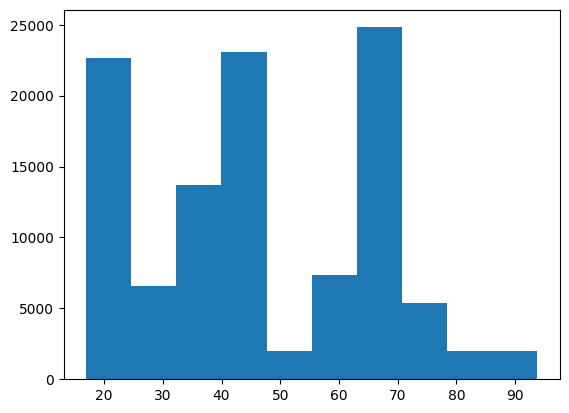

In [ ]:
revolutions = epm_clean['revolutions']
plt.hist(revolutions)
plt.show()

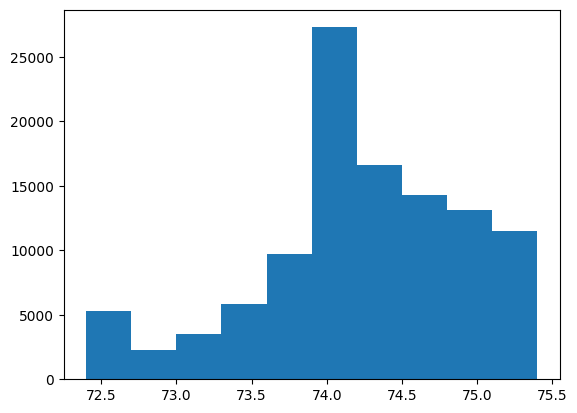

In [ ]:
humidity = epm_clean['humidity']
plt.hist(humidity)
plt.show()

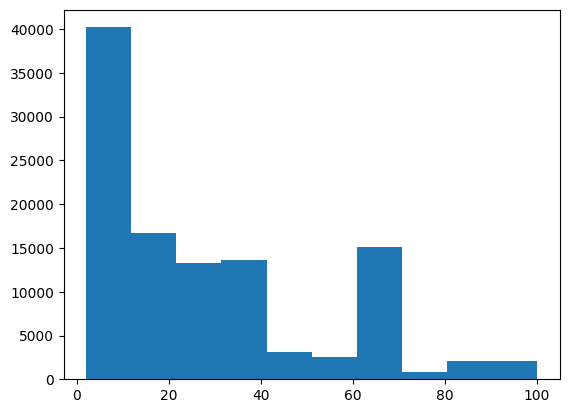

In [ ]:
vibration = epm_clean['vibration']
plt.hist(vibration)
plt.show()

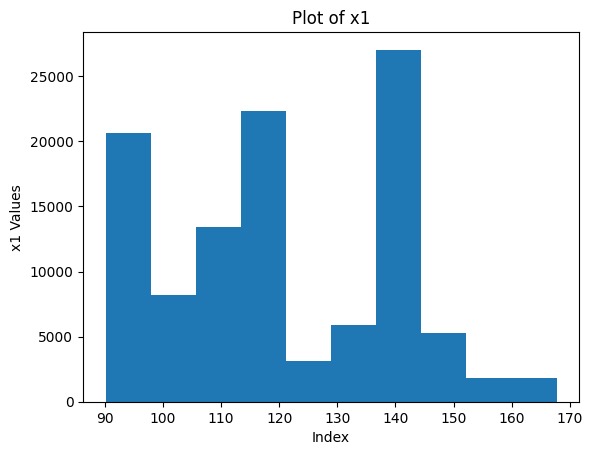

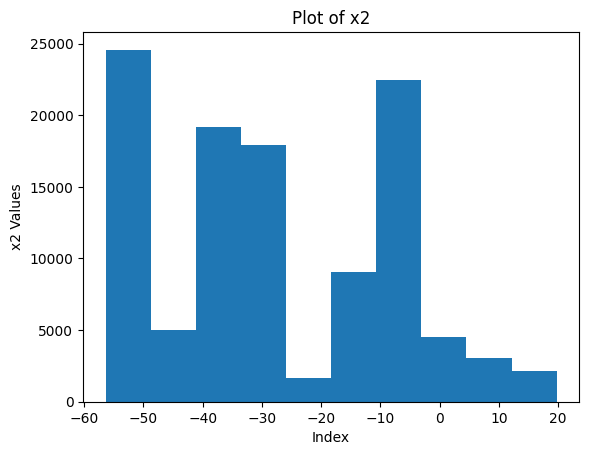

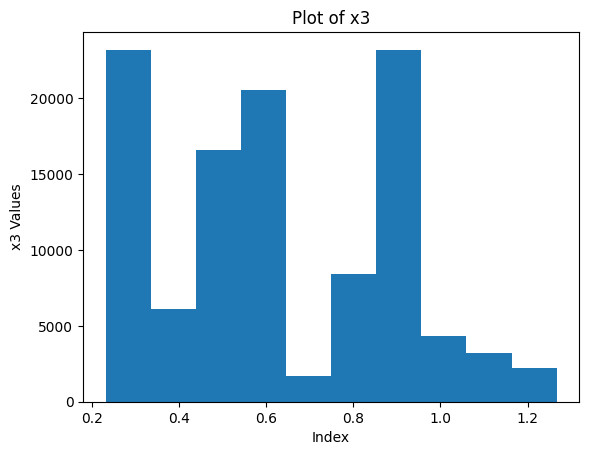

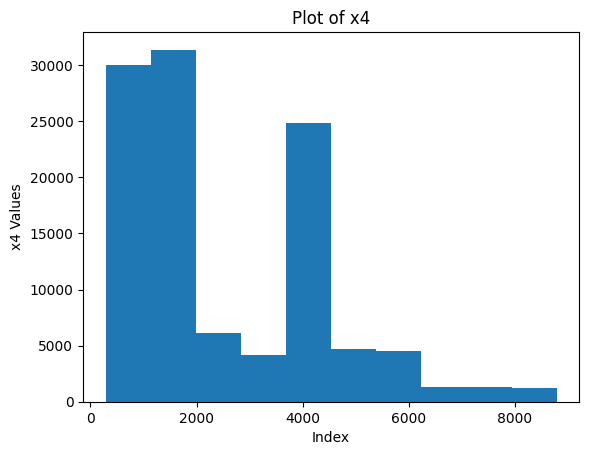

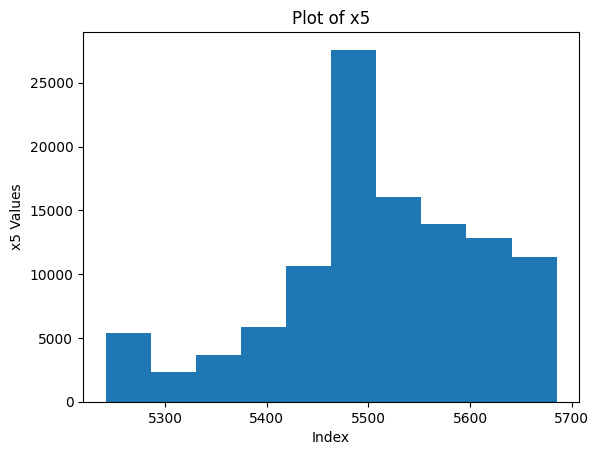

In [ ]:
# Extract and plot x1 through x5
for i in range(1, 6):
	plt.figure()  # Create a new figure for each plot
	plt.hist(epm_clean[f'x{i}'])
	plt.title(f'Plot of x{i}')
	plt.xlabel('Index')
	plt.ylabel(f'x{i} Values')
	plt.show()

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.7 Relationships between Features</span>


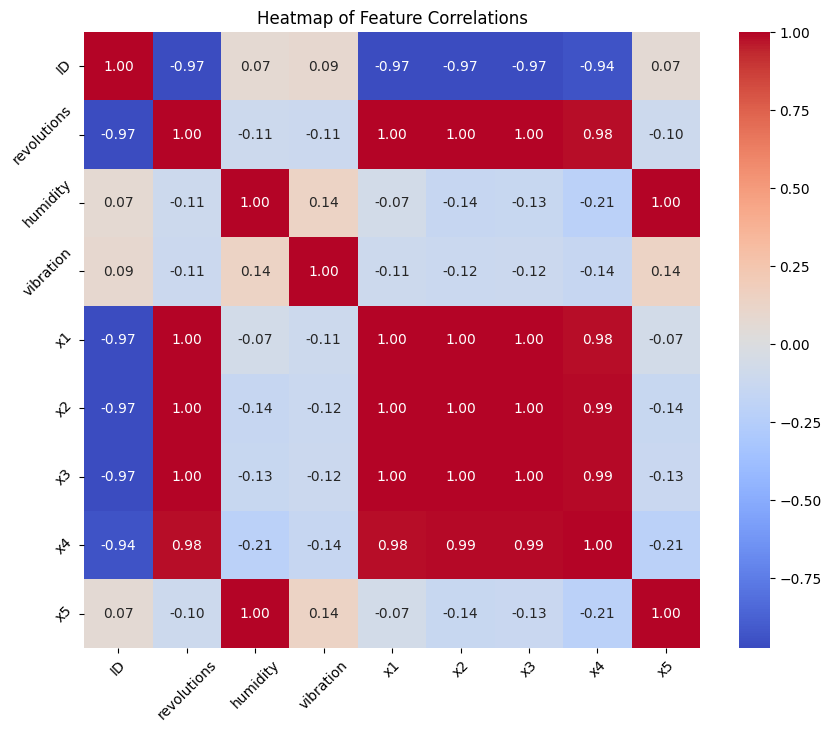

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# emp = pd.read_csv('path_to_your_dataset.csv')

# Calculate the correlation matrix
corr = epm_clean.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjusts the size of the plot
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Customizing the plot
plt.title('Heatmap of Feature Correlations')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.yticks(rotation=45)  # Rotates the y-axis labels for better readability

# Display the plot
plt.show()

X5 and humidity 
X4, x3, x2, x1 and revolution 

Non of the sensors work good with vibration

In [ ]:
import pandas as pd

# Read the training data
train_df = pd.read_csv('predictive-maintenance-dataset.csv', delimiter=',', header=0)

# Print the shape and first few rows
print('Shape of Train dataset: ', train_df.shape)
print(train_df.head())


Shape of Train dataset:  (112001, 9)
   ID  revolutions  humidity  vibration       x1      x2        x3  \
0   1       93.744    73.999       18.0  167.743  19.745  1.266828   
1   2       93.740    73.999       18.0  167.739  19.741  1.266774   
2   3       93.736    73.998       18.0  167.734  19.738  1.266737   
3   4       93.732    73.998       18.0  167.730  19.734  1.266683   
4   5       93.729    73.998       18.0  167.727  19.731  1.266642   

            x4           x5  
0  8787.937536  5475.852001  
1  8787.187600  5475.852001  
2  8786.437696  5475.704004  
3  8785.687824  5475.704004  
4  8785.125441  5475.704004  


In [ ]:
print(train_df.columns)  # Print column indices

Index(['ID', 'revolutions', 'humidity', 'vibration', 'x1', 'x2', 'x3', 'x4',
       'x5'],
      dtype='object')


In [ ]:
print(train_df.head())

   ID  revolutions  humidity  vibration       x1      x2        x3  \
0   1       93.744    73.999       18.0  167.743  19.745  1.266828   
1   2       93.740    73.999       18.0  167.739  19.741  1.266774   
2   3       93.736    73.998       18.0  167.734  19.738  1.266737   
3   4       93.732    73.998       18.0  167.730  19.734  1.266683   
4   5       93.729    73.998       18.0  167.727  19.731  1.266642   

            x4           x5  
0  8787.937536  5475.852001  
1  8787.187600  5475.852001  
2  8786.437696  5475.704004  
3  8785.687824  5475.704004  
4  8785.125441  5475.704004  


In [ ]:
import pandas as pd

# Step 1: Read the CSV file with the correct delimiter (comma in this case)
train_df = pd.read_csv('predictive-maintenance-dataset.csv', delimiter=',', header=0)

# Step 2: Print the first few rows to verify the data structure
print(train_df.head())

# Step 3: Print the shape of the DataFrame to understand its dimensions
print('Initial shape of Train dataset: ', train_df.shape)

# Step 4: Check the actual number of columns
num_columns = train_df.shape[1]
print(f"Number of columns: {num_columns}")

# Step 5: Define column names (ensure the count matches the number of columns)
col_names = ['id', 'revolutions', 'humidity', 'vibration', 'x1', 'x2', 'x3', 'x4', 'x5']

# Ensure the number of column names matches the number of columns in the DataFrame
if len(col_names) == num_columns:
    # Assign column names
    train_df.columns = col_names
else:
    print("Error: The number of column names does not match the number of columns in the DataFrame")
    print(f"Expected {num_columns} column names but got {len(col_names)}.")

# Print the columns to verify
print("Columns of the DataFrame:", train_df.columns)

# Print the shape and head of the Data


   ID  revolutions  humidity  vibration       x1      x2        x3  \
0   1       93.744    73.999       18.0  167.743  19.745  1.266828   
1   2       93.740    73.999       18.0  167.739  19.741  1.266774   
2   3       93.736    73.998       18.0  167.734  19.738  1.266737   
3   4       93.732    73.998       18.0  167.730  19.734  1.266683   
4   5       93.729    73.998       18.0  167.727  19.731  1.266642   

            x4           x5  
0  8787.937536  5475.852001  
1  8787.187600  5475.852001  
2  8786.437696  5475.704004  
3  8785.687824  5475.704004  
4  8785.125441  5475.704004  
Initial shape of Train dataset:  (112001, 9)
Number of columns: 9
Columns of the DataFrame: Index(['id', 'revolutions', 'humidity', 'vibration', 'x1', 'x2', 'x3', 'x4',
       'x5'],
      dtype='object')


In [ ]:
# Read the test data
test_df = pd.read_csv("predictive-maintenance-dataset.csv")

# Inspect the test DataFrame
print(test_df.shape) 
print(test_df.head()) 
print(test_df.columns)  


(112001, 9)
   ID  revolutions  humidity  vibration       x1      x2        x3  \
0   1       93.744    73.999       18.0  167.743  19.745  1.266828   
1   2       93.740    73.999       18.0  167.739  19.741  1.266774   
2   3       93.736    73.998       18.0  167.734  19.738  1.266737   
3   4       93.732    73.998       18.0  167.730  19.734  1.266683   
4   5       93.729    73.998       18.0  167.727  19.731  1.266642   

            x4           x5  
0  8787.937536  5475.852001  
1  8787.187600  5475.852001  
2  8786.437696  5475.704004  
3  8785.687824  5475.704004  
4  8785.125441  5475.704004  
Index(['ID', 'revolutions', 'humidity', 'vibration', 'x1', 'x2', 'x3', 'x4',
       'x5'],
      dtype='object')


In [ ]:
import pandas as pd

# Step 1: Read the CSV file with the correct delimiter (comma in this case)
truth_df = pd.read_csv('predictive-maintenance-dataset.csv', delimiter=',', header=0)

# Step 2: Print the first few rows to verify the data structure
print("Initial ground truth data:")
print(truth_df.head())

# Step 3: Print the shape of the DataFrame to understand its dimensions
print('Initial shape of ground truth dataset: ', truth_df.shape)

# Step 4: Drop the second column (which is 1-indexed, hence index 1)
if truth_df.shape[1] > 1:
    truth_df.drop(truth_df.columns[[1]], axis=1, inplace=True)
    print("Column 1 dropped successfully.")
else:
    print("Not enough columns to drop the specified column.")

# Step 5: Print the shape and head of the DataFrame to verify
print('Final shape of ground truth dataset: ', truth_df.shape)
print(truth_df.head())


Initial ground truth data:
   ID  revolutions  humidity  vibration       x1      x2        x3  \
0   1       93.744    73.999       18.0  167.743  19.745  1.266828   
1   2       93.740    73.999       18.0  167.739  19.741  1.266774   
2   3       93.736    73.998       18.0  167.734  19.738  1.266737   
3   4       93.732    73.998       18.0  167.730  19.734  1.266683   
4   5       93.729    73.998       18.0  167.727  19.731  1.266642   

            x4           x5  
0  8787.937536  5475.852001  
1  8787.187600  5475.852001  
2  8786.437696  5475.704004  
3  8785.687824  5475.704004  
4  8785.125441  5475.704004  
Initial shape of ground truth dataset:  (112001, 9)
Column 1 dropped successfully.
Final shape of ground truth dataset:  (112001, 8)
   ID  humidity  vibration       x1      x2        x3           x4  \
0   1    73.999       18.0  167.743  19.745  1.266828  8787.937536   
1   2    73.999       18.0  167.739  19.741  1.266774  8787.187600   
2   3    73.998       18.0  1

In [ ]:
train_df.sort_values

<bound method DataFrame.sort_values of             id  revolutions  humidity  vibration       x1      x2        x3  \
0            1       93.744    73.999      18.00  167.743  19.745  1.266828   
1            2       93.740    73.999      18.00  167.739  19.741  1.266774   
2            3       93.736    73.998      18.00  167.734  19.738  1.266737   
3            4       93.732    73.998      18.00  167.730  19.734  1.266683   
4            5       93.729    73.998      18.00  167.727  19.731  1.266642   
...        ...          ...       ...        ...      ...     ...       ...   
111996  111997       20.186    73.992       2.00   94.178 -53.806  0.272813   
111997  111998       20.186    73.992      20.01   94.178 -53.806  0.272813   
111998  111999       20.185    73.992      20.01   94.177 -53.807  0.272800   
111999  112000       20.185    73.992      20.00   94.177 -53.807  0.272800   
112000  112001       20.184    73.992       2.00   94.176 -53.808  0.272786   

            

In [ ]:
# sort based on id and cycle
train_df = train_df.sort_values(['id','revolutions'])
train_df.head()

,id,revolutions,humidity,vibration,x1,x2,x3,x4,x5
0,1,93.744,73.999,18.0,167.743,19.745,1.266828,8787.937536,5475.852001
1,2,93.740,73.999,18.0,167.739,19.741,1.266774,8787.187600,5475.852001
2,3,93.736,73.998,18.0,167.734,19.738,1.266737,8786.437696,5475.704004
3,4,93.732,73.998,18.0,167.730,19.734,1.266683,8785.687824,5475.704004
4,5,93.729,73.998,18.0,167.727,19.731,1.266642,8785.125441,5475.704004


<span style="color:#0F3460;font-size:19px; font-weight: bold;">Data Preprocessing </span>

In [ ]:
# Data Labeling - generate column RUL
rul = pd.DataFrame(train_df.groupby('id')['revolutions'].max()).reset_index()
rul.columns = ['id', 'max']
train_df = train_df.merge(rul, on=['id'], how='left')
train_df['RUL'] = train_df['max'] - train_df['revolutions']
train_df.drop('max', axis=1, inplace=True)
train_df.head()

,id,revolutions,humidity,vibration,x1,x2,x3,x4,x5,RUL
0,1,93.744,73.999,18.0,167.743,19.745,1.266828,8787.937536,5475.852001,0.0
1,2,93.740,73.999,18.0,167.739,19.741,1.266774,8787.187600,5475.852001,0.0
2,3,93.736,73.998,18.0,167.734,19.738,1.266737,8786.437696,5475.704004,0.0
3,4,93.732,73.998,18.0,167.730,19.734,1.266683,8785.687824,5475.704004,0.0
4,5,93.729,73.998,18.0,167.727,19.731,1.266642,8785.125441,5475.704004,0.0


In [ ]:
# generate label columns for training data
w1 = 50
w0 = 25
train_df['label1'] = np.where(train_df['RUL'] <= w1, 1, 0 )
train_df['label2'] = train_df['label1']
train_df.loc[train_df['RUL'] <= w0, 'label2'] = 2
train_df.head()

,id,revolutions,humidity,vibration,x1,x2,x3,x4,x5,RUL,label1,label2
0,1,93.744,73.999,18.0,167.743,19.745,1.266828,8787.937536,5475.852001,0.0,1,2
1,2,93.740,73.999,18.0,167.739,19.741,1.266774,8787.187600,5475.852001,0.0,1,2
2,3,93.736,73.998,18.0,167.734,19.738,1.266737,8786.437696,5475.704004,0.0,1,2
3,4,93.732,73.998,18.0,167.730,19.734,1.266683,8785.687824,5475.704004,0.0,1,2
4,5,93.729,73.998,18.0,167.727,19.731,1.266642,8785.125441,5475.704004,0.0,1,2


 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.8 Feature Scalling</span>

Text(0.5, 1.0, 'Line Plot for Revolutions and x1 over Time')

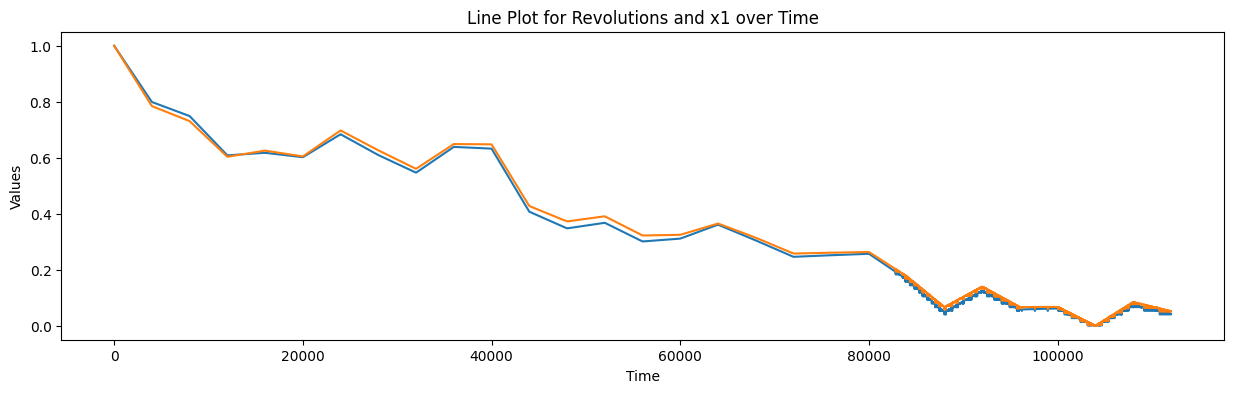

In [ ]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df['revolutions'] = scaler.fit_transform(train_df['revolutions'].values.reshape(-1,1))
train_df['humidity'] = scaler.fit_transform(train_df['humidity'].values.reshape(-1,1))
train_df['vibration'] = scaler.fit_transform(train_df['vibration'].values.reshape(-1,1))
train_df['x1'] = scaler.fit_transform(train_df['x1'].values.reshape(-1,1))
train_df['x2'] = scaler.fit_transform(train_df['x2'].values.reshape(-1,1))
train_df['x3'] = scaler.fit_transform(train_df['x3'].values.reshape(-1,1))
train_df['x4'] = scaler.fit_transform(train_df['x4'].values.reshape(-1,1))
train_df['x5'] = scaler.fit_transform(train_df['x5'].values.reshape(-1,1))

train_df.head()


 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.9 Visualizing Relationships</span>

- revolutions vs x1

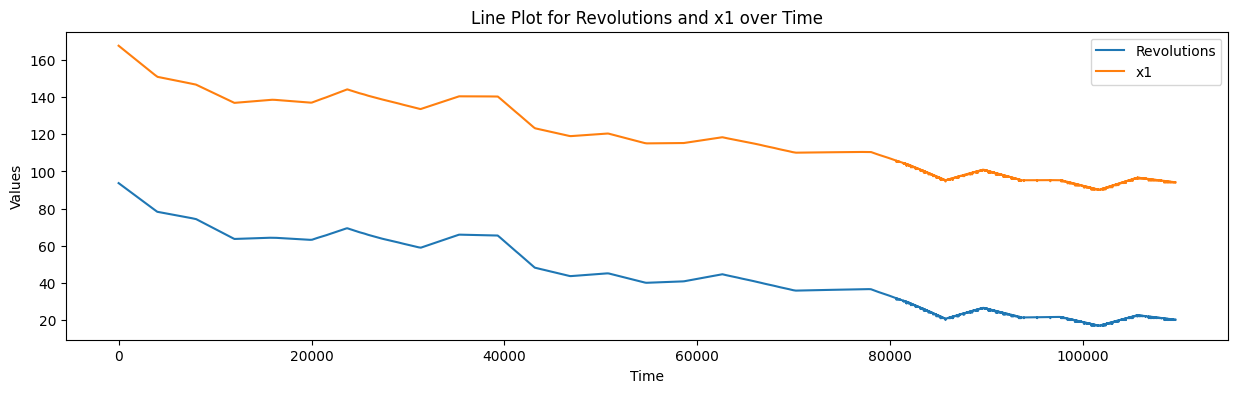

In [ ]:
# Prepare data for revolutions vs. x1 plot
revolutions = epm_clean['revolutions']
x1 = epm_clean['x1']
time_revolutions = np.arange(len(revolutions))

humidity = epm_clean['humidity']
x5 = epm_clean['x5']
time_humidity = np.arange(len(humidity))

# Create a figure and axis for revolutions vs. x1 plot
plt.figure(figsize=(15, 4))
plt.plot(time_revolutions, revolutions, label='Revolutions')
plt.plot(time_revolutions, x1, label='x1')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Line Plot for Revolutions and x1 over Time')
plt.legend()
plt.show()


- Humidity vs x5

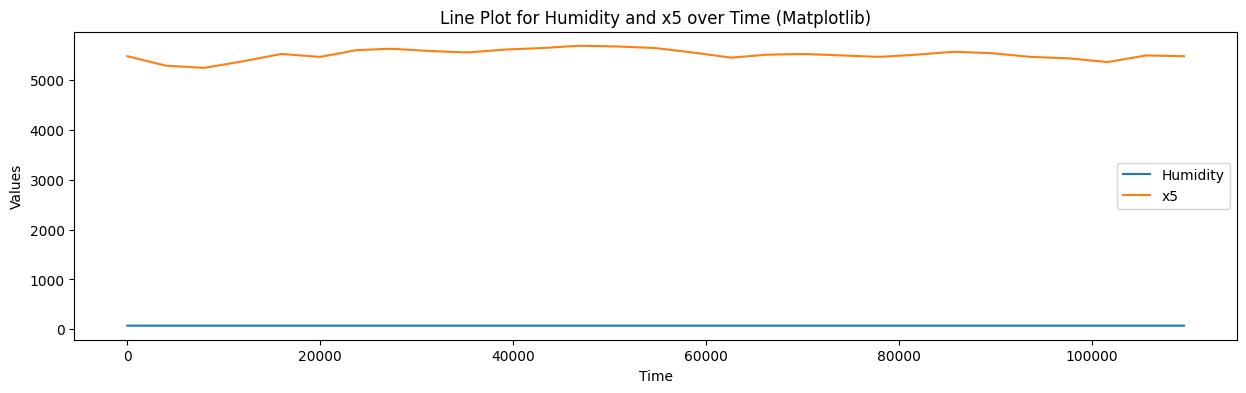

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(time_humidity, humidity, label='Humidity')
plt.plot(time_humidity, x5, label='x5')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Line Plot for Humidity and x5 over Time (Matplotlib)')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(epm_clean[['revolutions', 'humidity', 'vibration', 'x1', 'x2', 'x3', 'x4', 'x5']])

# Create sequences and labels
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length]  # Adjust this based on your problem
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

seq_length = 10
seq_array, label_array = create_sequences(scaled_features, seq_length)


In [ ]:
# Example for multi-class classification with 8 classes
model = Sequential()
model.add(LSTM(
    units=64,
    input_shape=(10, 8),
    return_sequences=True
))
model.add(Dropout(0.2))

model.add(LSTM(
    units=32,
    return_sequences=False
))
model.add(Dropout(0.2))

model.add(Dense(units=8, activation='softmax'))  # 8 units for 8 classes

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
print(seq_array.shape)  # Should be (number of samples, timesteps, number of features)
# For binary classification
y_train = np.array(y_train).reshape(-1, 1)  # Ensure y_train has shape (None, 1)


(109553, 10, 8)


In [ ]:
seq_array = np.array(seq_array, dtype=np.float32)
label_array = np.array(label_array, dtype=np.float32)


In [ ]:
assert not np.any(np.isnan(seq_array))
assert not np.any(np.isinf(seq_array))


In [ ]:
X_train = seq_array[:1000]  # Use a smaller sample for quick debugging
y_train = label_array[:1000]

model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1)


Epoch 1/2


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 8), output.shape=(None, 1)

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.10 Function to reshape dataset as required by LSTM</span>

In [ ]:
def gen_sequence(epm_clean, seq_length, seq_cols):

    # Ensure only feature columns are used
    data_array = epm_clean[seq_cols].values
    num_elements = data_array.shape[0]

    for start, stop in zip(range(0, num_elements - seq_length + 1), range(seq_length, num_elements + 1)):
          yield data_array[start:stop, :]


In [ ]:
# Define sequence length and columns to use
sequence_length = 3
feature_columns = ['revolutions', 'humidity', 'vibration', 'x1', 'x2', 'x3', 'x4', 'x5']


In [ ]:
# Generator for the sequences
seq_gen = (list(gen_sequence(epm_clean[epm_clean['vibration'] == id], sequence_length, feature_columns))
           for id in epm_clean['vibration'].unique())

In [ ]:
# Convert generator to list, filtering out empty sequences
seq_list = [seq for seq_batch in seq_gen for seq in seq_batch if seq_batch]
seq_array = np.concatenate(seq_list).astype(np.float32)

# Print the shape of the resulting numpy array
print(seq_array.shape)

(277710, 8)


In [ ]:
def gen_labels(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements, :]

In [ ]:
label_gen = [gen_labels(epm_clean[epm_clean['vibration']==id], sequence_length, ['humidity'])
             for id in epm_clean['vibration'].unique()]
label_array = np.concatenate(label_gen).astype(np.float32)
print(label_array.shape)

(86609, 1)


In [ ]:
# Define the model
model = Sequential()

# First LSTM layer
model.add(LSTM(
    units=256,
    input_shape=(seq_array.shape[1], seq_array.shape[2]),  # seq_length and number of features
    return_sequences=True
))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(
    units=128,
    return_sequences=True
))
model.add(Dropout(0.2))

# Third LSTM layer
model.add(LSTM(
    units=64,
    return_sequences=False
))
model.add(Dropout(0.2))

# Dense layer
model.add(Dense(units=1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Verify the architecture
print(model.summary())


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 10, 256)        │       268,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 10, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 514,881 (1.96 MB)

 Trainable params: 514,881 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(seq_array, label_array, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 190ms/step - accuracy: 0.5000 - loss: 0.6928 - val_accuracy: 0.6250 - val_loss: 0.6835
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5187 - loss: 0.6906 - val_accuracy: 0.6250 - val_loss: 0.6892
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5312 - loss: 0.6963 - val_accuracy: 0.3750 - val_loss: 0.7013
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4362 - loss: 0.6980 - val_accuracy: 0.5000 - val_loss: 0.6891
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5048 - loss: 0.6929 - val_accuracy: 0.6250 - val_loss: 0.6774
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5256 - loss: 0.6882 - val_accuracy: 0.6250 - val_loss: 0.6777
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4905 - loss: 0.6959 - val_accuracy: 0.6250 - val_loss: 0.6774
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5256 - loss: 0.6843 - val_accuracy: 0.6250 - val_loss: 0.6716

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4500 - loss: 0.7067
Test Loss: 0.7067252397537231
Test Accuracy: 0.44999998807907104


<hr>

<span style="color:#0F3460;font-size:19px; font-weight: bold;">Results</span>

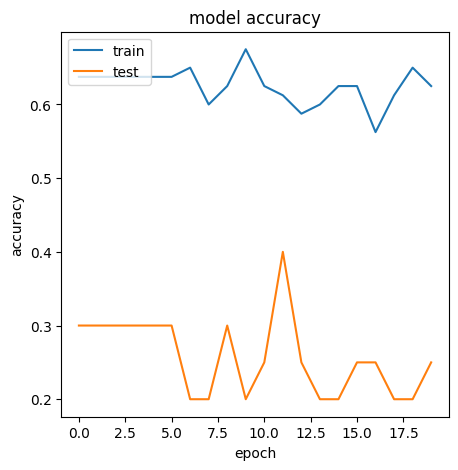

In [ ]:
fig_acc = plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

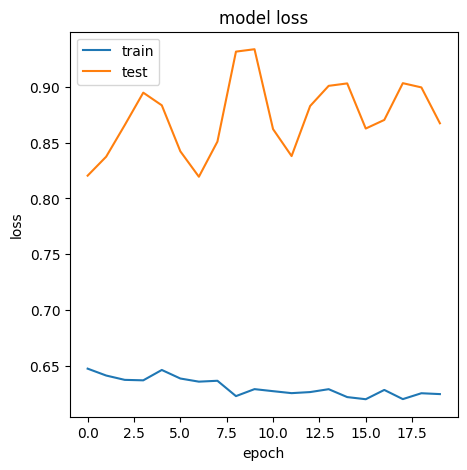

In [ ]:
fig_acc = plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve, precision_score, recall_score

def print_results(y_test, y_pred):
    # F1 Score
    f1 = f1_score(y_test, y_pred)
    print("F1 Score: ", f1)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    
    # ROC AUC Score
    model_roc_auc = roc_auc_score(y_test, y_pred)
    print("Area under curve: ", model_roc_auc, "\n")
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    gmeans = np.sqrt(tpr * (1 - fpr))
    ix = np.argmax(gmeans)
    best_threshold = np.round(thresholds[ix], 3)
    
    plt.subplot(122)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC: %.3f' % model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold: ' + str(best_threshold))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# training metrics
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=128)
print('Accurracy of model on training data: {}'.format(scores[1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5600 - loss: 0.6643
Accurracy of model on training data: 0.5600000023841858


In [ ]:
# make predictions and compute confusion matrix
y_pred_prob = model.predict(seq_array, verbose=1, batch_size=128)

# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Flatten the predictions to match the shape of y_test
y_pred = y_pred.flatten()

# Assuming y_true is the true labels
y_true = label_array.flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


In [ ]:
# Compute and print precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print('Precision: ', precision)
print('Recall: ', recall)

Precision:  0.5747126436781609
Recall:  0.8771929824561403


In [96]:
# Print results
print_results(y_true, y_pred)

NameError: name 'print_results' is not defined